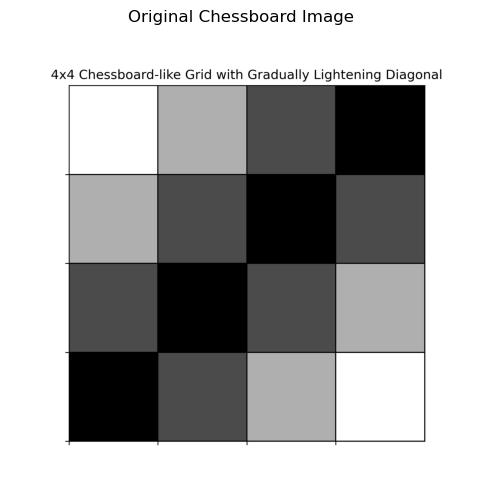

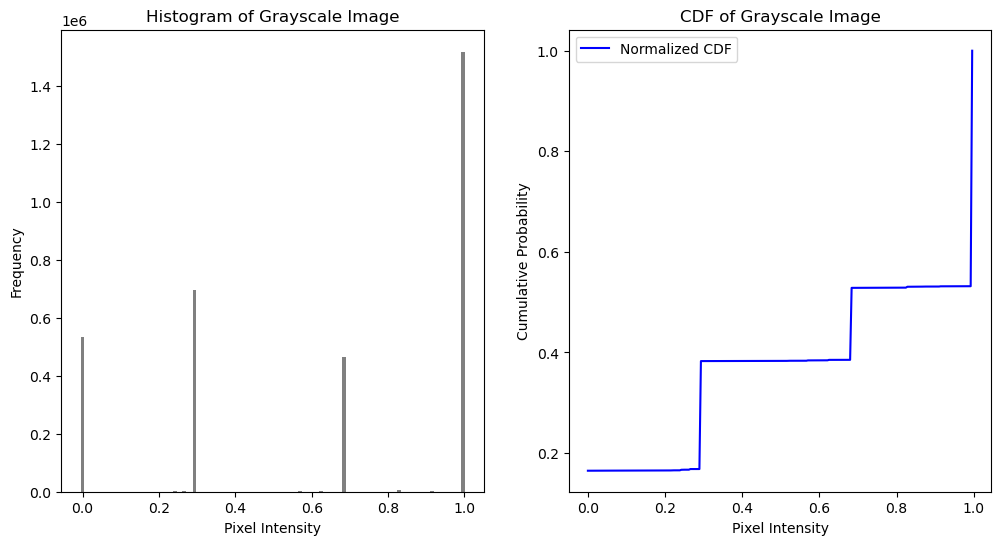

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create the gradient chessboard-like image
def gradient_chessboard_4x4():
    # Size of the 4x4 grid
    rows, cols = 4, 4
    fig, ax = plt.subplots(figsize=(6, 6))

    # Loop through each square in the 4x4 grid
    for i in range(rows):
        for j in range(cols):
            # Define intensity based on diagonal distance
            intensity = 255  # Default: white
            if i == j:
                intensity = 0  # Main diagonal: black
            elif abs(i - j) == 1:
                intensity = 75  # Next diagonal: lighter black
            elif abs(i - j) == 2:
                intensity = 175  # Further diagonal: even lighter

            # Convert intensity to RGB color
            color = (intensity / 255, intensity / 255, intensity / 255)

            # Plot each square
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='black'))

    # Formatting the grid
    ax.set_xticks(np.arange(0, cols, 1))
    ax.set_yticks(np.arange(0, rows, 1))
    ax.set_xticklabels([])  # Remove x-axis ticks
    ax.set_yticklabels([])  # Remove y-axis ticks
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    plt.gca().set_aspect('equal', adjustable='box')  # Maintain aspect ratio
    plt.title("4x4 Chessboard-like Grid with Gradually Lightening Diagonal")

    # Save the plot as a PNG file
    plt.savefig('gradient_chessboard_4x4_matplotlib.png', dpi=300)
    plt.close()  # Close the figure to free memory

# Call the function to generate and save the grid as an image
gradient_chessboard_4x4()

# Load the saved image using plt.imread()
image = plt.imread('gradient_chessboard_4x4_matplotlib.png')

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Original Chessboard Image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

# Convert the image to grayscale (for simplicity in histogram calculation)
gray_image = np.dot(image[:, :, :3], [0.2989, 0.5870, 0.1140])  # RGB to grayscale conversion

# Calculate the histogram for the grayscale image
histogram, bins = np.histogram(gray_image.flatten(), bins=256, range=(0, 1))

# Calculate the CDF
cdf = np.cumsum(histogram)
cdf_normalized = cdf / cdf[-1]  # Normalize CDF

# Plot the grayscale histogram
plt.figure(figsize=(12, 6))

# Subplot for histogram
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], histogram, width=0.01, color='gray')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Subplot for CDF
plt.subplot(1, 2, 2)
plt.plot(bins[:-1], cdf_normalized, color='blue', label='Normalized CDF')
plt.title('CDF of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()

# Save the histogram and CDF plots
plt.savefig('histogram_and_cdf_grayscale_image.png', dpi=300)

plt.show()
